In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv(r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\data\processed\final_data.csv")

In [3]:
x = df.drop(["Units Sold","Sales"], axis=1)
y = df['Units Sold']

In [4]:
numerical_features = x.select_dtypes(include='number').columns.tolist()
categorical_features = x.select_dtypes(include = 'object').columns.tolist()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [6]:
from sklearn.linear_model import LinearRegression

# إنشاء pipeline جديد باستخدام Linear Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# تدريب النموذج
lr_pipeline.fit(x_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred = lr_pipeline.predict(x_test)

# حساب مقاييس التقييم
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

# طباعة النتائج
print("Linear Regression Results:")
print("MAE:", mae_lr)
print("R² Score:", r2_lr)
print("RMSE:", rmse_lr)



Linear Regression Results:
MAE: 7.493095046742772
R² Score: 0.9916662098961588
RMSE: 8.686964396042463


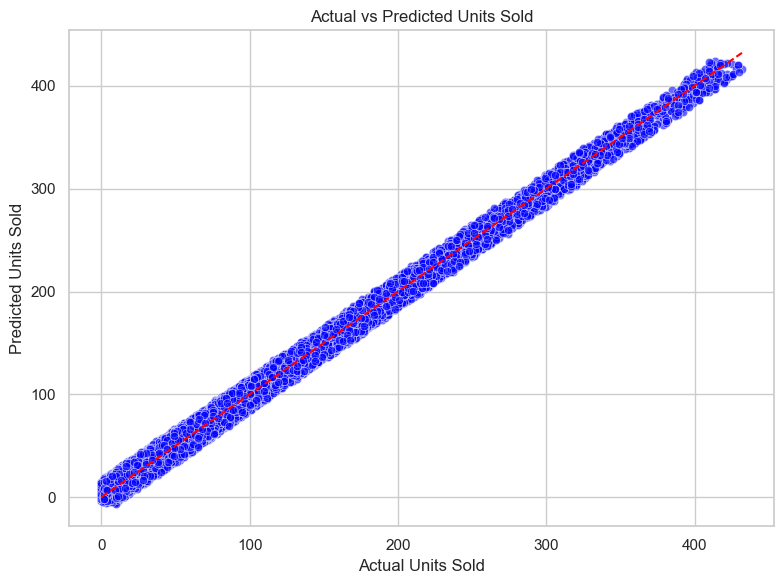

In [7]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line

# Add labels and title
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Units Sold")
plt.tight_layout()
plt.show()

In [8]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("linear-regression-sales-forecasting")

with mlflow.start_run(run_name="LinearRegression"):
    # Log parameters
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_param("test_size", 0.2)
    mlflow.log_param("numerical_features", numerical_features)
    mlflow.log_param("categorical_features", categorical_features)
    mlflow.log_param("scaler", "StandardScaler")
    mlflow.log_param("encoder", "OneHotEncoder(handle_unknown='ignore')")

    # Train model
    lr_pipeline.fit(x_train, y_train)

    # Predict and calculate metrics
    y_pred = lr_pipeline.predict(x_test)
    mae_lr = mean_absolute_error(y_test, y_pred)
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_lr = r2_score(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("mae", mae_lr)
    mlflow.log_metric("rmse", rmse_lr)
    mlflow.log_metric("r2", r2_lr)

    # Log model
    mlflow.sklearn.log_model(lr_pipeline, "model")

    print("Linear Regression Results:")
    print("MAE:", mae_lr)
    print("R² Score:", r2_lr)
    print("RMSE:", rmse_lr)

2025/05/20 22:13:55 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/05/20 22:14:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Linear Regression Results:
MAE: 7.493095046742772
R² Score: 0.9916662098961588
RMSE: 8.686964396042463
